# Introduction

In [2]:
!pip install wfdb

  Obtaining dependency information for wfdb from https://files.pythonhosted.org/packages/ce/00/b83d0bd64384455dbc1f8eccb7b5d6dac23728515a9d4d74aa4def6c6fe4/wfdb-4.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for SoundFile>=0.10.0 from https://files.pythonhosted.org/packages/50/ff/26a4ee48d0b66625a4e4028a055b9f25bc9d7c7b2d17d21a45137621a50d/soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cffi>=1.0 from https://files.pythonhosted.org/packages/be/3e/0b197d1bfbf386a90786b251dbf2634a15f2ea3d4e4070e99c7d1c7689cf/cffi-1.16.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for pycparser from https://files.pythonhosted.org/packages/13/a3/a812df4e2dd5696d1f351d58b8fe16a405b234ad2886a0dab9183fb78109/pycparser-2.22-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/160.0 kB ? eta -:--:--
   ---------------------------------------- 160.0/160.0 kB 4.8 MB/s eta 0:00:00
   ---------------------


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wfdb                            # Package for loading the ecg and annotation


In [4]:
# Importing Data
data = '../input/mit-bih-arrhythmia-database/'

In [5]:
# List of Patients
patients = ['100','101','102','103','104','105','106','107',
           '108','109','111','112','113','114','115','116',
           '117','118','119','121','122','123','124','200',
           '201','202','203','205','207','208','209','210',
           '212','213','214','215','217','219','220','221',
           '222','223','228','230','231','232','233','234']

In [4]:
# Non Beat Symbols
nonbeat = ['[','!',']','x','(',')','p','t','u','`',
           '\'','^','|','~','+','s','T','*','D','=','"','@','Q','?']

# Abnormal Beat Symbols
abnormal = ['L','R','V','/','A','f','F','j','a','E','J','e','S']

# Classification based on AAMI
AAMI = ['N','L','R','B','A','a','j','S','V','r','F','e','j','n','E','f','/','Q','?']

# Normal Beat Symbols
normal = ['N']

In [5]:
dic = {'N':['N','L','R','B'],
       'S':['A','a','j','S','e','j','n'],
       'V':['V','r','E'],
       'F':['F'],
       'Q':['Q','?','f','/'],
      }

In [6]:
# changing the window size 
from wfdb import rdrecord, rdann, processing
from sklearn import preprocessing

record = wfdb.rdrecord(data+'100',smooth_frames=True)
l2 = preprocessing.scale(np.nan_to_num(record.p_signal[:,0]))

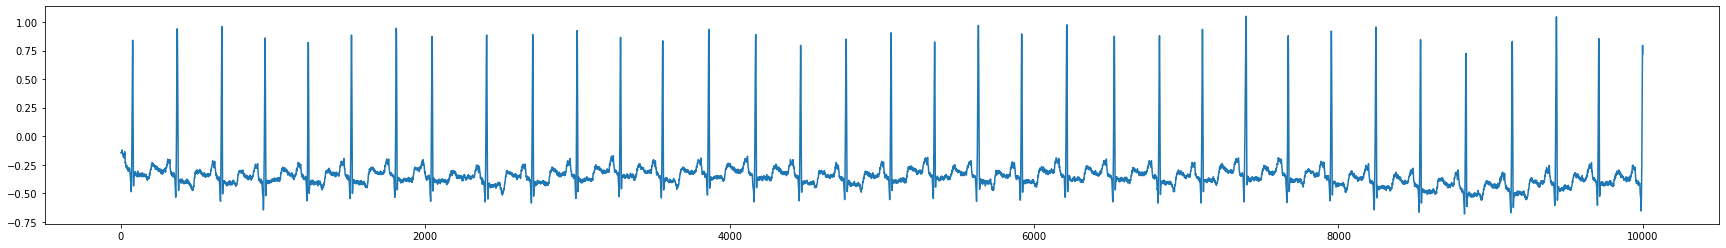

In [7]:
plt.figure(figsize=(30, 4))
plt.plot(record.p_signal[:10000,0])
plt.savefig('ecg.png', format='png', dpi=400)

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
lm = min_max_scaler.fit_transform(record.p_signal[:,0].reshape(-1,1))


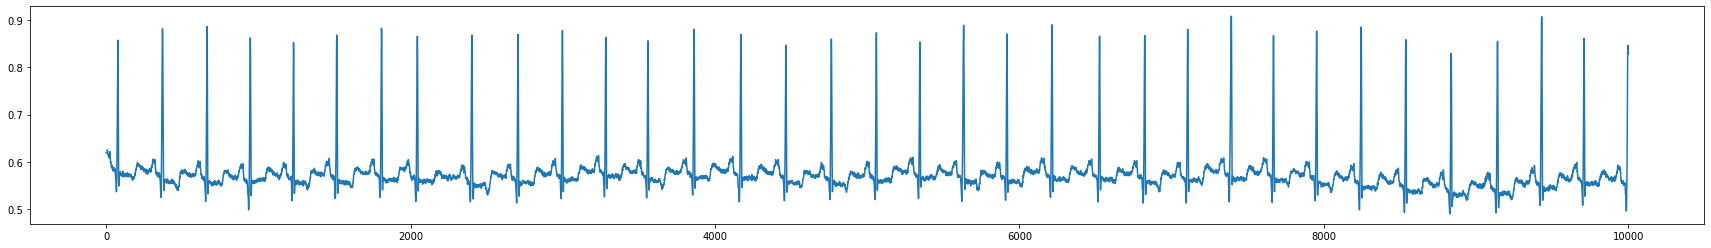

In [9]:

plt.figure(figsize=(30, 4))
plt.plot(lm[:10000])
plt.savefig('ecg_scaled.png', format='png', dpi=400)

In [10]:
# changing the window size 
from wfdb import rdrecord, rdann, processing
from sklearn import preprocessing

fs = 360
insize = 180

y = []
beat_l2 = []
#beat_v5 = []

for num in patients:
    print('record number',num)
    record = wfdb.rdrecord(data+num,smooth_frames=True)
    l2 = preprocessing.scale(np.nan_to_num(record.p_signal[:,0]))
    #v2 = preprocessing.scale(np.nan_to_num(record.p_signal[:,1]))

    qrs = processing.XQRS(sig = l2,fs = fs)
    qrs.detect()
    peaks = qrs.qrs_inds
      
    
    for peak in peaks[1:-1]:
        start,end = peak-insize//2, peak+insize//2
        ann = wfdb.rdann(data+num,extension='atr', sampfrom = start, sampto = end, 
                         return_label_elements=['symbol'])
        annsymbol =ann.symbol
        if len(annsymbol) == 1 and annsymbol[0] in AAMI:
            for cl, an in dic.items():
                if annsymbol[0] in an:
                    y.append(cl)
                    beat_l2.append(l2[start:end])
                    #beat_v5.append(v5[start:end])

record number 100
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 101
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 102
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 103
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 104
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 105
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Runni

In [11]:
z= []
for i in range(len(beat_l2)):
    if len(beat_l2[i])!=180:
        z.append(i)
print(z)

[]


In [12]:
df = pd.DataFrame(beat_l2)

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.006723,-0.019156,0.032603,0.006723,0.084363,0.032603,0.032603,0.006723,0.006723,0.084363,...,-0.588516,-0.536756,-0.562636,-0.614396,-0.588516,-0.666156,-0.640276,-0.640276,-0.588516,-0.640276
1,-0.122676,-0.200316,-0.200316,-0.252076,-0.226196,-0.174436,-0.122676,-0.174436,-0.174436,-0.174436,...,-0.484996,-0.562636,-0.510876,-0.510876,-0.536756,-0.562636,-0.588516,-0.588516,-0.614396,-0.562636
2,-0.355596,-0.407356,-0.252076,-0.277956,-0.252076,-0.277956,-0.277956,-0.329716,-0.277956,-0.200316,...,-0.303836,-0.329716,-0.355596,-0.407356,-0.433236,-0.433236,-0.355596,-0.303836,-0.407356,-0.381476
3,-0.200316,-0.200316,-0.226196,-0.252076,-0.200316,-0.122676,-0.122676,-0.148556,-0.148556,-0.174436,...,-0.510876,-0.614396,-0.614396,-0.614396,-0.588516,-0.614396,-0.743796,-0.717916,-0.743796,-0.666156
4,-0.174436,-0.174436,-0.174436,-0.096796,-0.096796,-0.096796,-0.200316,-0.226196,-0.174436,-0.122676,...,-0.484996,-0.459116,-0.459116,-0.510876,-0.536756,-0.614396,-0.614396,-0.536756,-0.536756,-0.588516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107770,-0.293947,-0.308763,-0.323578,-0.308763,-0.323578,-0.353210,-0.353210,-0.323578,-0.323578,-0.264315,...,-0.323578,-0.353210,-0.323578,-0.353210,-0.382842,-0.323578,-0.293947,-0.249499,-0.249499,-0.249499
107771,-0.086526,-0.086526,-0.101341,-0.145789,-0.175420,-0.145789,-0.160605,-0.086526,-0.086526,-0.086526,...,-0.130973,-0.160605,-0.145789,-0.160605,-0.160605,-0.160605,-0.190236,-0.056894,-0.101341,-0.116157
107772,-0.219868,-0.219868,-0.219868,-0.205052,-0.205052,-0.190236,-0.145789,-0.116157,-0.101341,-0.130973,...,-0.516184,-0.471736,-0.382842,-0.368026,-0.323578,-0.323578,-0.338394,-0.308763,-0.323578,-0.293947
107773,-0.338394,-0.323578,-0.323578,-0.308763,-0.308763,-0.323578,-0.264315,-0.249499,-0.264315,-0.264315,...,-0.308763,-0.338394,-0.308763,-0.323578,-0.293947,-0.279131,-0.279131,-0.293947,-0.308763,-0.368026


In [14]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

le = LabelEncoder()
y_no = le.fit_transform(y)

print(Counter(y))
print(Counter(y_no))

Counter({'N': 89694, 'Q': 8001, 'V': 6487, 'S': 2814, 'F': 779})
Counter({1: 89694, 2: 8001, 4: 6487, 3: 2814, 0: 779})


In [15]:
df['target']=y_no
df

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,target
0,0.006723,-0.019156,0.032603,0.006723,0.084363,0.032603,0.032603,0.006723,0.006723,0.084363,...,-0.536756,-0.562636,-0.614396,-0.588516,-0.666156,-0.640276,-0.640276,-0.588516,-0.640276,1
1,-0.122676,-0.200316,-0.200316,-0.252076,-0.226196,-0.174436,-0.122676,-0.174436,-0.174436,-0.174436,...,-0.562636,-0.510876,-0.510876,-0.536756,-0.562636,-0.588516,-0.588516,-0.614396,-0.562636,1
2,-0.355596,-0.407356,-0.252076,-0.277956,-0.252076,-0.277956,-0.277956,-0.329716,-0.277956,-0.200316,...,-0.329716,-0.355596,-0.407356,-0.433236,-0.433236,-0.355596,-0.303836,-0.407356,-0.381476,1
3,-0.200316,-0.200316,-0.226196,-0.252076,-0.200316,-0.122676,-0.122676,-0.148556,-0.148556,-0.174436,...,-0.614396,-0.614396,-0.614396,-0.588516,-0.614396,-0.743796,-0.717916,-0.743796,-0.666156,1
4,-0.174436,-0.174436,-0.174436,-0.096796,-0.096796,-0.096796,-0.200316,-0.226196,-0.174436,-0.122676,...,-0.459116,-0.459116,-0.510876,-0.536756,-0.614396,-0.614396,-0.536756,-0.536756,-0.588516,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107770,-0.293947,-0.308763,-0.323578,-0.308763,-0.323578,-0.353210,-0.353210,-0.323578,-0.323578,-0.264315,...,-0.353210,-0.323578,-0.353210,-0.382842,-0.323578,-0.293947,-0.249499,-0.249499,-0.249499,1
107771,-0.086526,-0.086526,-0.101341,-0.145789,-0.175420,-0.145789,-0.160605,-0.086526,-0.086526,-0.086526,...,-0.160605,-0.145789,-0.160605,-0.160605,-0.160605,-0.190236,-0.056894,-0.101341,-0.116157,1
107772,-0.219868,-0.219868,-0.219868,-0.205052,-0.205052,-0.190236,-0.145789,-0.116157,-0.101341,-0.130973,...,-0.471736,-0.382842,-0.368026,-0.323578,-0.323578,-0.338394,-0.308763,-0.323578,-0.293947,1
107773,-0.338394,-0.323578,-0.323578,-0.308763,-0.308763,-0.323578,-0.264315,-0.249499,-0.264315,-0.264315,...,-0.338394,-0.308763,-0.323578,-0.293947,-0.279131,-0.279131,-0.293947,-0.308763,-0.368026,1


In [19]:
classes = df['target'].unique()

print("Unique classes in the target column:")
for cls in classes:
    print(cls)

Unique classes in the target column:
1
3
4
2
0


In [2]:
# Importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wfdb
from scipy.signal import butter, filtfilt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Define bandpass filter functions
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Parameters for bandpass filter
lowcut = 0.5
highcut = 45.0
fs = 360.0  # Sampling rate of MIT-BIH Arrhythmia Database
order = 4

# Importing Data
data = 'C:\\Users\\sesid\\Downloads\\mit-bih-arrhythmia-database-1.0.0\\mit-bih-arrhythmia-database-1.0.0\\'
# List of Patients
patients = ['100','101','102','103','104','105','106','107',
           '108','109','111','112','113','114','115','116',
           '117','118','119','121','122','123','124','200',
           '201','202','203','205','207','208','209','210',
           '212','213','214','215','217','219','220','221',
           '222','223','228','230','231','232','233','234']

# Classification based on AAMI
AAMI = ['N','L','R','B','A','a','j','S','V','r','F','e','j','n','E','f','/','Q','?']
dic = {'N':['N','L','R','B'],
       'S':['A','a','j','S','e','j','n'],
       'V':['V','r','E'],
       'F':['F'],
       'Q':['Q','?','f','/']}

fs = 360
insize = 180  # Update this value for 2-second segments

y = []
beat_l2 = []

for num in patients:
    print('record number', num)
    record = wfdb.rdrecord(data + num, smooth_frames=True)
    l2 = preprocessing.scale(np.nan_to_num(record.p_signal[:, 0]))

    # Apply the bandpass filter
    l2_filtered = butter_bandpass_filter(l2, lowcut, highcut, fs, order)

    qrs = wfdb.processing.gqrs_detect(sig=l2_filtered, fs=fs)  # Use gqrs_detect for QRS detection
    peaks = qrs

    for peak in peaks[1:-1]:
        start, end = peak - insize // 2, peak + insize // 2
        ann = wfdb.rdann(data + num, extension='atr', sampfrom=start, sampto=end, return_label_elements=['symbol'])
        annsymbol = ann.symbol
        if len(annsymbol) == 1 and annsymbol[0] in AAMI:
            for cl, an in dic.items():
                if annsymbol[0] in an:
                    y.append(cl)
                    beat_l2.append(l2_filtered[start:end])

z = []
for i in range(len(beat_l2)):
    if len(beat_l2[i]) != insize:  # Ensure all segments have the correct length
        z.append(i)
print(z)

# Remove segments with incorrect length
beat_l2 = [beat for i, beat in enumerate(beat_l2) if i not in z]
y = [label for i, label in enumerate(y) if i not in z]

df = pd.DataFrame(beat_l2)
le = LabelEncoder()
y_no = le.fit_transform(y)

print(Counter(y))
print(Counter(y_no))
df['target'] = y_no

# Save to CSV file
df.to_csv('denoised_ecg_segments.csv', index=False)

classes = df['target'].unique()
print("Unique classes in the target column:")
for cls in classes:
    print(cls)


record number 100
record number 101
record number 102
record number 103
record number 104
record number 105
record number 106
record number 107
record number 108
record number 109
record number 111
record number 112
record number 113
record number 114
record number 115
record number 116
record number 117
record number 118
record number 119
record number 121
record number 122
record number 123
record number 124
record number 200
record number 201
record number 202
record number 203
record number 205
record number 207
record number 208
record number 209
record number 210
record number 212
record number 213
record number 214
record number 215
record number 217
record number 219
record number 220
record number 221
record number 222
record number 223
record number 228
record number 230
record number 231
record number 232
record number 233
record number 234
[]
Counter({'N': 91506, 'Q': 8025, 'V': 7098, 'S': 2943, 'F': 792})
Counter({1: 91506, 2: 8025, 4: 7098, 3: 2943, 0: 792})
Unique classe

In [2]:
import wfdb
from wfdb import processing

# Define bandpass filter functions
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency is half the sampling rate
    low = lowcut / nyquist  # Normalize low cutoff frequency
    high = highcut / nyquist  # Normalize high cutoff frequency
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y



# Parameters for bandpass and notch filters
lowcut = 0.2  # Low cutoff frequency
highcut = 49.5  # High cutoff frequency
fs = 360.0  # Sampling rate of MIT-BIH Arrhythmia Database
order = 4
notch_freq = 60.0  # Notch filter frequency
Q = 30.0  # Quality factor for notch filter

# Importing Data
data = 'C:\\Users\\sesid\\Downloads\\mit-bih-arrhythmia-database-1.0.0\\mit-bih-arrhythmia-database-1.0.0\\'
# List of Patients
patients = ['100', '101', '102', '103', '104', '105', '106', '107',
           '108', '109', '111', '112', '113', '114', '115', '116',
           '117', '118', '119', '121', '122', '123', '124', '200',
           '201', '202', '203', '205', '207', '208', '209', '210',
           '212', '213', '214', '215', '217', '219', '220', '221',
           '222', '223', '228', '230', '231', '232', '233', '234']

# Classification based on AAMI
AAMI = ['N', 'L', 'R', 'B', 'A', 'a', 'j', 'S', 'V', 'r', 'F', 'e', 'j', 'n', 'E', 'f', '/', 'Q', '?']
dic = {'N': ['N', 'L', 'R', 'B'],
       'S': ['A', 'a', 'j', 'S', 'e', 'j', 'n'],
       'V': ['V', 'r', 'E'],
       'F': ['F'],
       'Q': ['Q', '?', 'f', '/']}

fs = 360
insize = 180  # Segment size

y = []
beat_l2 = []

for num in patients:
    print('record number', num)
    record = wfdb.rdrecord(data + num, smooth_frames=True)
    l2 = preprocessing.scale(np.nan_to_num(record.p_signal[:, 0]))

    # Apply the bandpass filter
    l2_filtered = butter_bandpass_filter(l2, lowcut, highcut, fs, order)

    # QRS Detection using gqrs
    gqrs = processing.gqrs_detect(sig=l2_filtered, fs=fs)
    qrs_peaks = processing.correct_peaks(sig=l2_filtered, peak_inds=gqrs, search_radius=fs//10, smooth_window_size=150)

    peaks = qrs_peaks

    for peak in peaks[1:-1]:
        start, end = peak - insize // 2, peak + insize // 2
        ann = wfdb.rdann(data + num, extension='atr', sampfrom=start, sampto=end, return_label_elements=['symbol'])
        annsymbol = ann.symbol
        if len(annsymbol) == 1 and annsymbol[0] in AAMI:
            for cl, an in dic.items():
                if annsymbol[0] in an:
                    y.append(cl)
                    beat_l2.append(l2_filtered[start:end])

z = []
for i in range(len(beat_l2)):
    if len(beat_l2[i]) != insize:  # Ensure all segments have the correct length
        z.append(i)
print(z)

# Remove segments with incorrect length
beat_l2 = [beat for i, beat in enumerate(beat_l2) if i not in z]
y = [label for i, label in enumerate(y) if i not in z]

df = pd.DataFrame(beat_l2)
le = LabelEncoder()
y_no = le.fit_transform(y)

print(Counter(y))
print(Counter(y_no))
df['target'] = y_no

# Save to CSV file
df.to_csv('denoised_ecg_segments.csv', index=False)

classes = df['target'].unique()
print("Unique classes in the target column:")
for cls in classes:
    print(cls)


record number 100
record number 101
record number 102
record number 103
record number 104
record number 105
record number 106
record number 107
record number 108
record number 109
record number 111
record number 112
record number 113
record number 114
record number 115
record number 116
record number 117
record number 118
record number 119
record number 121
record number 122
record number 123
record number 124
record number 200
record number 201
record number 202
record number 203
record number 205
record number 207
record number 208
record number 209
record number 210
record number 212
record number 213
record number 214
record number 215
record number 217
record number 219
record number 220
record number 221
record number 222
record number 223
record number 228
record number 230
record number 231
record number 232
record number 233
record number 234
[]
Counter({'N': 90514, 'Q': 8007, 'V': 6956, 'S': 2923, 'F': 785})
Counter({1: 90514, 2: 8007, 4: 6956, 3: 2923, 0: 785})
Unique classe

In [8]:
output_path = 'C:\\Users\\sesid\\Downloads\\mitbih.csv'
df.to_csv(output_path, index=False)